# Plotting data from file

How can we use what we have learnt in the past few workshops to read data from a file? And how can we plot this?

One way to then plot this data would be to extract the index and/or multiple columns we are interested in plotting and use `matplotlib` as we have done before.

As an example, we'll look at a new data file. This contains a simulation of the (fractional) concentration change for two species in a reaction, "A" and "B" where $A \rightarrow B$.

In [1]:
data_filename = "data/FIRST ORDER_k=0.0005.txt"

If we open this file more directly in Python when we looked at a text file) we can take quick look at the contents to see what this looks like:

In [2]:
open_file = open(data_filename)
data_from_file = open_file.read()
print(data_from_file[0:200])

Time	A	B	
0	1	0	
100	0.950565	0.0494353	
200	0.903573	0.0964268	
300	0.858905	0.141095	
400	0.816445	0.183555	
500	0.776083	0.223917	
600	0.737717	0.262283	
700	0.701248	0.298752	
800	0.666582	0.33341


From printing out the first 200 characters, we can see this looks like a table of data with each column separated by spaces. This looks nicely formatted with a title row including the column names and no extra header rows.

We will see in the next year that there are dedicate packages to manipulate large tabulated files. However, for now we can exploit `numpy` as a quick and effective way to read such input.

In [3]:
import numpy as np

data_kinetic_k0005 = np.genfromtxt("data/FIRST ORDER_k=0.0005.txt", names=True)


This is a special kind of array called a **structured** array, because it has **named fields**. You can check this by querying the subproperties of the array:

In [4]:
data_kinetic_k0005.dtype.names

('Time', 'A', 'B')

These various **names are the fields** of the array, corresponding to the columns in the file. This syntax is reminiscent of what we have seen in the case of **dictionaries**, where **keys** are used to specific other objects stored in the dictionary.

In [5]:
data_kinetic_k0005['A']

array([1.        , 0.950565  , 0.903573  , 0.858905  , 0.816445  ,
       0.776083  , 0.737717  , 0.701248  , 0.666582  , 0.633629  ,
       0.602305  , 0.57253   , 0.544227  , 0.517323  , 0.491749  ,
       0.467439  , 0.444331  , 0.422365  , 0.401486  , 0.381638  ,
       0.362772  , 0.344838  , 0.327791  , 0.311586  , 0.296183  ,
       0.281541  , 0.267623  , 0.254393  , 0.241817  , 0.229863  ,
       0.218499  , 0.207698  , 0.19743   , 0.18767   , 0.178393  ,
       0.169574  , 0.161191  , 0.153222  , 0.145648  , 0.138447  ,
       0.131603  , 0.125097  , 0.118913  , 0.113035  , 0.107447  ,
       0.102135  , 0.097086  , 0.0922865 , 0.0877243 , 0.0833876 ,
       0.0792653 , 0.0753468 , 0.071622  , 0.0680813 , 0.0647157 ,
       0.0615165 , 0.0584754 , 0.0555846 , 0.0528368 , 0.0502248 ,
       0.0477419 , 0.0453818 , 0.0431383 , 0.0410057 , 0.0389786 ,
       0.0370517 , 0.03522   , 0.0334789 , 0.0318239 , 0.0302506 ,
       0.0287552 , 0.0273337 , 0.0259824 , 0.024698  , 0.02347

This data also has a column for "Time" as the number of seconds elapsed.

In [6]:
data_kinetic_k0005 ['Time']

array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
         800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
        1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
        2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
        3200.,  3300.,  3400.,  3500.,  3600.,  3700.,  3800.,  3900.,
        4000.,  4100.,  4200.,  4300.,  4400.,  4500.,  4600.,  4700.,
        4800.,  4900.,  5000.,  5100.,  5200.,  5300.,  5400.,  5500.,
        5600.,  5700.,  5800.,  5900.,  6000.,  6100.,  6200.,  6300.,
        6400.,  6500.,  6600.,  6700.,  6800.,  6900.,  7000.,  7100.,
        7200.,  7300.,  7400.,  7500.,  7600.,  7700.,  7800.,  7900.,
        8000.,  8100.,  8200.,  8300.,  8400.,  8500.,  8600.,  8700.,
        8800.,  8900.,  9000.,  9100.,  9200.,  9300.,  9400.,  9500.,
        9600.,  9700.,  9800.,  9900., 10000.])

To create a plot for **time** vs **concentration of A**, we can extract this data from our array

In [7]:
# Extract time and concentration of A from our array
time = data_kinetic_k0005['Time']
concentration_A = data_kinetic_k0005["A"]

We could then use matplotlib to plot this:

Text(0, 0.5, 'Concentration')

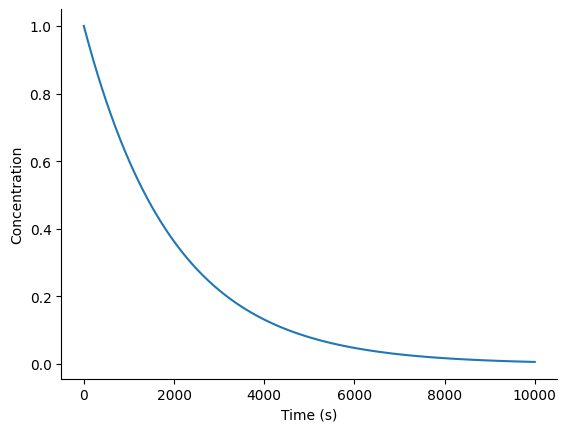

In [8]:
import matplotlib.pyplot as plt

# Create our Figure and Axes objects for plotting
fig, ax = plt.subplots()

# Plot our data - time vs concentration of A
ax.plot(time, concentration_A)

# Add x and y labels for this data
ax.set_xlabel("Time (s)")
ax.set_ylabel("Concentration")

This simulation shows a clean relationship as concentration decreases over time (in an exponential way).

Suppose we want to filter our data and plot only concentrations less than 0.5. We can simply create a **boolean** array that masks the invalid data.

In [9]:
mask = concentration_A <= 0.5
concentration_A_low = concentration_A[mask]
# Make sure to match the time values (index) to our filtered data
time_low = time[mask]

Here we have filtered our data to include all fractional concentrations less than (or equal to) 0.5. Notice we have also matched our time values to plot to these concentrations by extracting the index from our new array `concentration_A_low`.

[Text(0.5, 0, 'Time (s)'), Text(0, 0.5, 'Concentration')]

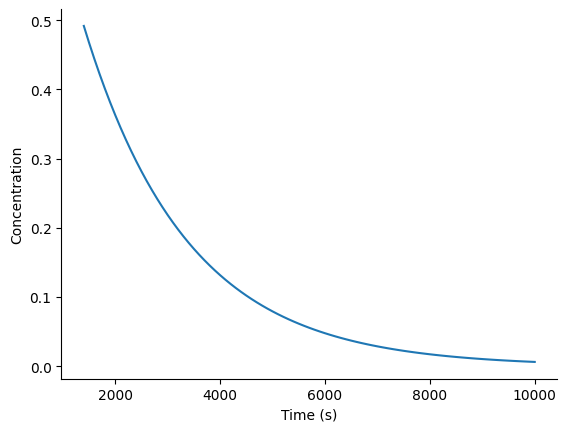

In [10]:
# Create our Figure and Axes objects for plotting
fig, ax = plt.subplots()

# Plot our data - time vs concentration of A
ax.plot(time_low, concentration_A_low)

# Note: Alternative syntax! we can set multiple properties at once
ax.set(xlabel = "Time (s)",  ylabel="Concentration")

You can also see the slope is similiar (in fact it is the same) between our unfiltered and filtered data (this is due to the exponential relationship).

---

### Exercise 

 1. Re-plot the un-filtered graph created above and add another line to show **concentration of B** vs **time**  from the `data_kinetic_k0005` array on the same plot. 
  - Can you include a label for A and B?

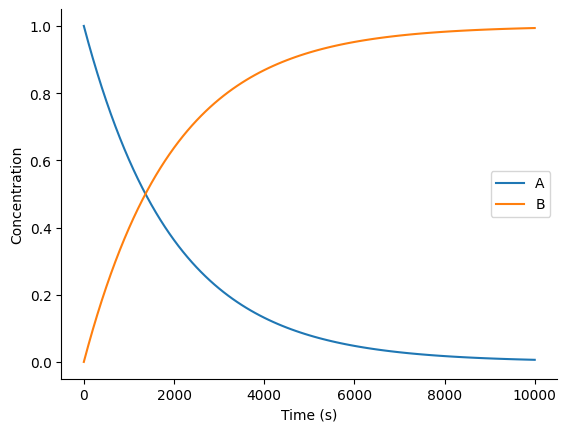

In [11]:
### ADD CODE HERE (copy code from above and add to this)

fig, ax = plt.subplots()

ax.plot(time, concentration_A, label="A")
ax.plot(time, data_kinetic_k0005["B"], label="B")

ax.set_xlabel("Time (s)")
ax.set_ylabel("Concentration")
ax.legend()

2. Calculate the the sum of the concentrations for these two columns (A and B).

In [14]:
### ADD CODE HERE

sum_concentration = concentration_A + data_kinetic_k0005["B"]
print(sum_concentration)

[1.         1.0000003  0.9999998  1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.0000005
 1.0000003  0.9999996  1.0000003  0.9999998  1.         1.0000003
 0.9999997  1.0000005  1.0000004  0.9999996  0.9999998  0.9999998
 0.9999999  0.9999998  1.0000003  0.9999997  0.9999996  0.9999997
 1.         0.9999999  0.9999999  0.9999996  1.0000002  0.9999997
 1.0000004  1.         1.         1.0000004  1.0000002  0.9999995
 0.9999997  1.0000001  1.0000004  1.0000002  1.0000003  0.9999997
 1.0000003  1.0000003  0.9999998  1.0000002  0.9999998  1.0000001
 0.9999996  0.99999987 0.99999968 0.99999972 0.99999979 0.9

3. Re-plot the graph created in the previous question and add this sum as a third line.

 - Consider: What does this sum tell us about "A" is decaying into "B"?

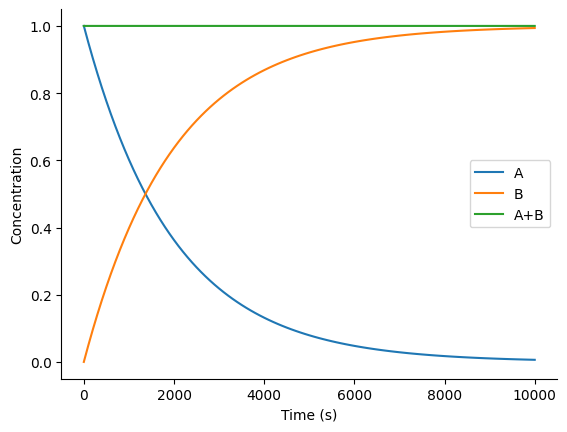

In [18]:
### ADD CODE HERE (copy code from previous question and add to this)

fig, ax = plt.subplots()

ax.plot(time, concentration_A, label="A")
ax.plot(time, data_kinetic_k0005["B"], label="B")

ax.set_xlabel("Time (s)")
ax.set_ylabel("Concentration")
ax.plot(time, sum_concentration, label="A+B")
ax.legend()

> We add the sum of concentrations (A+B) as a third line to the plot. This sum remains very close to 1 throughout the reaction, indicating that as "A" decays, it is converted into "B" without significant loss or gain of total concentration. This demonstrates conservation of mass in the reaction: all of "A" is accounted for as it becomes "B".